#### Floyd-Warshall's Algorithm


Transitive Closure Matrix:
[1, 1, 1, 1, 1, 1]
[0, 1, 0, 1, 1, 1]
[0, 0, 1, 0, 1, 1]
[0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 1]


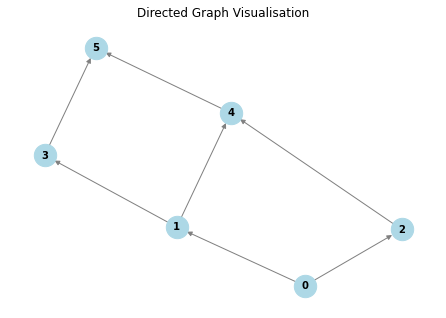

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(vertices):
    edges = []
    adj_list = {i: [] for i in range(vertices)}
    return {"V": vertices, "edges": edges, "adj_list": adj_list}

def add_edge(graph, u, v):
    graph["edges"].append((u, v))
    graph["adj_list"][u].append(v)

def floyd_warshall_transitive_closure(graph):
    V = graph["V"]
    tc = [[0] * V for _ in range(V)]

    # Initialize self-reachability
    for i in range(V):
        tc[i][i] = 1

    # Direct edges
    for u, v in graph["edges"]:
        tc[u][v] = 1

    # Floyd-Warshall update
    for k in range(V):
        for i in range(V):
            for j in range(V):
                tc[i][j] = tc[i][j] or (tc[i][k] and tc[k][j])

    return tc

def draw_graph(graph):
    G = nx.DiGraph()

    for u, v in graph["edges"]:
        G.add_edge(u, v)

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500,
            font_size=10, font_weight='bold', edge_color='gray', arrows=True)

    plt.title("Directed Graph Visualisation")
    plt.show()

# An example

graph = create_graph(6)

add_edge(graph, 0, 1)
add_edge(graph, 0, 2)
add_edge(graph, 1, 3)
add_edge(graph, 1, 4)
add_edge(graph, 2, 4)
add_edge(graph, 3, 5)
add_edge(graph, 4, 5)

# Compute Transitive Closure
tc_matrix = floyd_warshall_transitive_closure(graph)

print("\nTransitive Closure Matrix:")
for row in tc_matrix:
    print(row)

# Draw the graph
draw_graph(graph)


#### Transitive Closure by Networkx

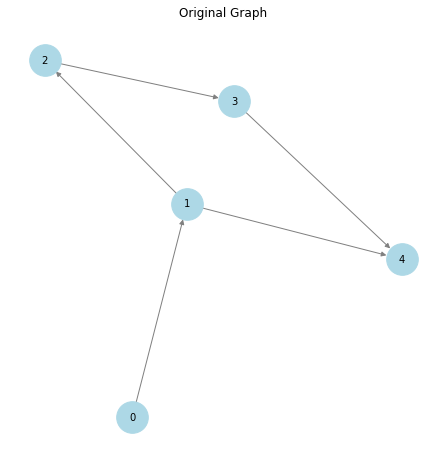

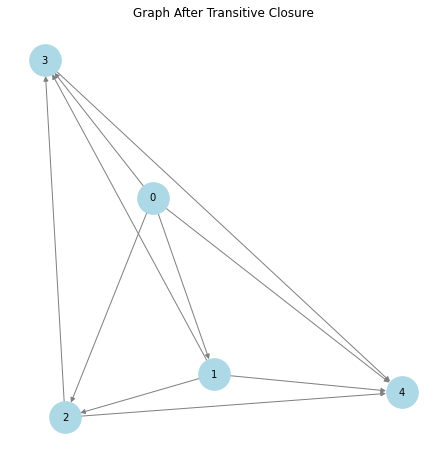

Edges in Transitive Closure Graph: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 4), (1, 3), (2, 3), (2, 4), (3, 4)]


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(G, title):
    """Helper function to draw the graph"""
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=10)
    plt.title(title)
    plt.show()

# Define a directed graph (before transitive closure)
G = nx.DiGraph()
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (1, 4)]
G.add_edges_from(edges)

# Draw the original graph
draw_graph(G, "Original Graph")

# Compute transitive closure
closure_G = nx.transitive_closure(G)

# Draw the transitive closure graph
draw_graph(closure_G, "Graph After Transitive Closure")

# Print the new edges added
print("Edges in Transitive Closure Graph:", closure_G.edges)